In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [3]:
df = pd.read_csv("updated_power_generation_data.csv")

In [4]:
features = ["latitude", "longitude", "shortwave_radiation_backwards_sfc", "azimuth", "zenith","angle_of_incidence"]
target = "generated_power_kw"
X = df[features]
y = df[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [7]:
preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", mean_squared_error(y_test, preds, squared=False))
print("R²:", r2_score(y_test, preds))

MAE: 319.50135005737246
RMSE: 497.0480666697279
R²: 0.7295385000088156


C:\Users\nihar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
joblib.dump(model, "solar_power_model.pkl")
print("✅ Model trained and saved as solar_power_model.pkl")


✅ Model trained and saved as solar_power_model.pkl


In [9]:
import matplotlib.pyplot as plt

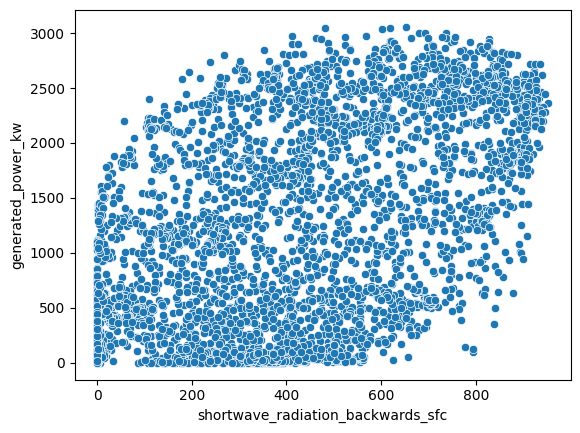

In [31]:
sns.scatterplot(x=df['shortwave_radiation_backwards_sfc'],y=df['generated_power_kw'])
plt.show()

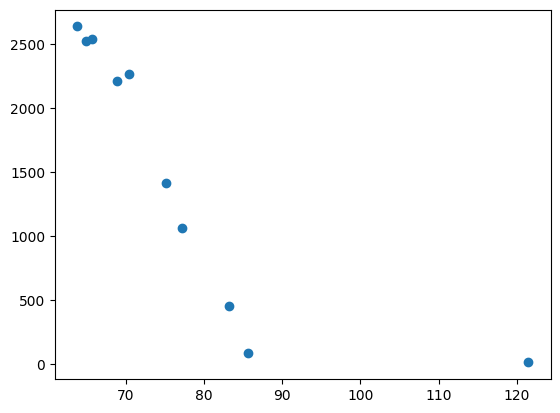

In [15]:
plt.scatter(df['zenith'][:10],df['generated_power_kw'][:10])

In [16]:
import seaborn as sns

<Axes: xlabel='zenith', ylabel='generated_power_kw'>

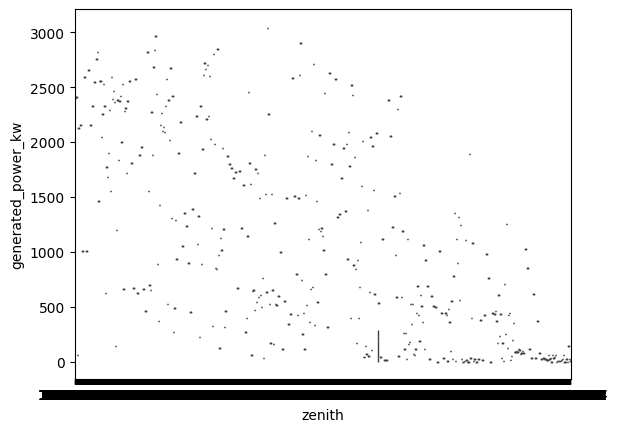

In [20]:
sns.boxplot(x=df['zenith'],y=df['generated_power_kw'])

<Axes: xlabel='zenith', ylabel='generated_power_kw'>

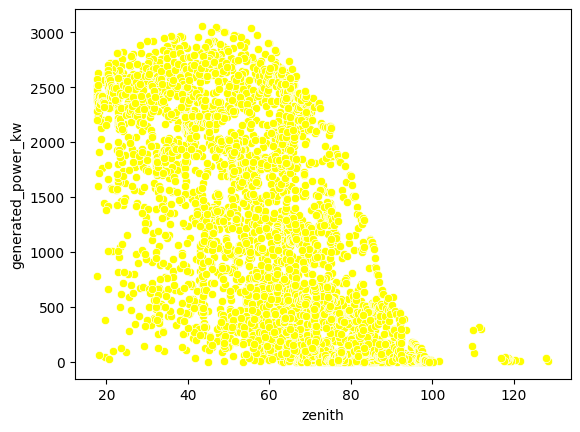

In [25]:
sns.scatterplot(x=df['zenith'],y=df['generated_power_kw'],color='yellow')

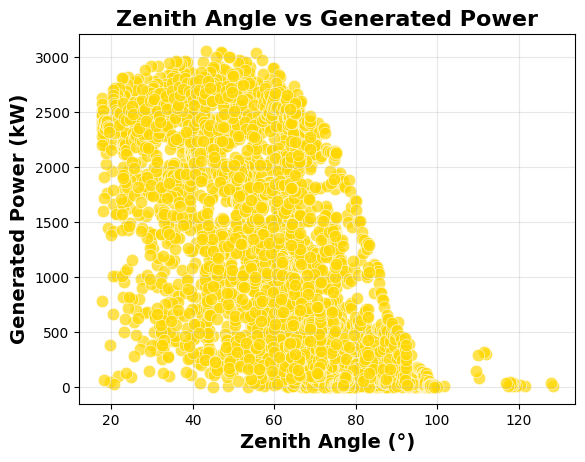

In [26]:
sns.scatterplot(data=df, 
                x=df['zenith'], 
                y=df['generated_power_kw'],
                color='gold',  # Better yellow than 'yellow'
                s=80,  # Larger points
                alpha=0.7,  # Transparency
                edgecolor='white',  # White edges like your reference
                linewidth=0.5)

plt.xlabel('Zenith Angle (°)', fontsize=14, fontweight='bold')
plt.ylabel('Generated Power (kW)', fontsize=14, fontweight='bold')
plt.title('Zenith Angle vs Generated Power', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

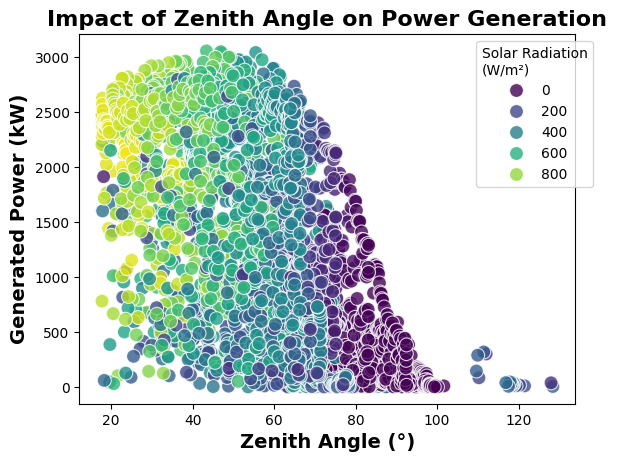

In [27]:
sns.scatterplot(data=df, 
                x=df['zenith'], 
                y=df['generated_power_kw'],
                hue='shortwave_radiation_backwards_sfc',  # Color by radiation
                palette='viridis',  # Purple to yellow like reference
                s=100,
                alpha=0.8,
                edgecolor='white',
                linewidth=0.8)

plt.xlabel('Zenith Angle (°)', fontsize=14, fontweight='bold')
plt.ylabel('Generated Power (kW)', fontsize=14, fontweight='bold')
plt.title('Impact of Zenith Angle on Power Generation', fontsize=16, fontweight='bold')
plt.legend(title='Solar Radiation\n(W/m²)', bbox_to_anchor=(1.05, 1))

Text(0.05, 0.95, 'Correlation: -0.650')

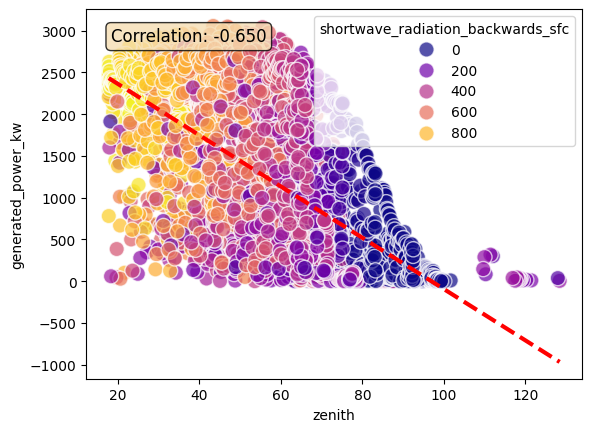

In [30]:
ax = sns.scatterplot(data=df, 
                    x=df['zenith'], 
                    y=df['generated_power_kw'],
                    hue='shortwave_radiation_backwards_sfc',
                    palette='plasma',  # Alternative colormap
                    s=120,
                    alpha=0.7,
                    edgecolor='white',
                    linewidth=1)

# Add trend line
z = np.polyfit(df['zenith'], df['generated_power_kw'], 1)
p = np.poly1d(z)
trend_x = np.linspace(df['zenith'].min(), df['zenith'].max(), 100)
plt.plot(trend_x, p(trend_x), 
         color='red', linestyle='--', linewidth=3, 
         label=f'Trend: y = {z[0]:.2f}x + {z[1]:.1f}')

# Add correlation statistics
correlation = df['zenith'].corr(df['generated_power_kw'])
textstr = f'Correlation: {correlation:.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

In [12]:
import numpy as np
preds.shape
# y_train.shape

(843,)

In [16]:
preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", mean_squared_error(y_test, preds, squared=False))
print("R²:", r2_score(y_train, preds))

MAE: 319.5013500573724
RMSE: 497.0480666697279


C:\Users\nihar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: y_true and y_pred have different number of output (6!=1)